In [2]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from utils import mlp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm import tqdm

In [3]:
DATA_PATH = './data'
BATCH_SIZE = 128

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'-> Using device: {device}')
# device = torch.device('cpu')

-> Using device: cpu


/home/carlosepy/Documents/ann-deeplearning/env/lib/python3.12/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
gen = torch.manual_seed(42)
transform = transforms.Compose([transforms.ToTensor()])

In [6]:
train_dataset = datasets.MNIST(
    root=DATA_PATH,
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root=DATA_PATH,
    train=False,
    transform=transform,
    download=True
)

In [7]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Visualização de uma amostra de imagens (`num_samples`). Código adaptado de [Variational Autoencoder (VAE) — PyTorch Tutorial](https://medium.com/@rekalantar/variational-auto-encoder-vae-pytorch-tutorial-dce2d2fe0f5f).

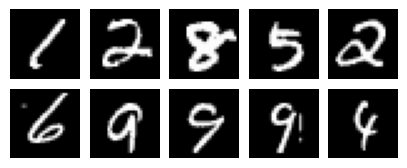

In [8]:
dataiter = iter(train_loader)
image = next(dataiter)

num_samples = 10
sample_images = [image[0][i,0] for i in range(num_samples)] 

fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

In [9]:
vae = mlp.VAE(device).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

In [10]:
def loss_function(x, x_pred, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_pred, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD    

Realizando o treinamento do modelo.
Parâmetros utilizados:

- `batch_size = 128`;

- `epochs = 100`;

- `device = "cuda"`;

In [10]:
def train(model, device, train_loader, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0

        # cria barra de progresso para os batches
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

        for batch_idx, (data, _) in enumerate(progress_bar):
            batch_size = data.size(0)
            data = data.to(device).view(batch_size, -1)

            optimizer.zero_grad()
            
            x_pred, mu, logvar = model(data)
            loss = loss_function(data, x_pred, mu, logvar)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * batch_size

            # atualiza descrição da barra
            progress_bar.set_postfix(loss=loss.item())

        avg_loss = train_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs} - Average loss: {avg_loss:.6f}")

    return train_loss


In [11]:
train(vae, device, train_loader, optimizer, epochs=100)

Epoch 1/100 - Average loss: 24657.084301


Epoch 2/100 - Average loss: 21331.829536


Epoch 3/100 - Average loss: 20806.649042


Epoch 4/100 - Average loss: 20410.057200


Epoch 5/100 - Average loss: 20118.253807


Epoch 6/100 - Average loss: 19902.246052


Epoch 7/100 - Average loss: 19724.908535


Epoch 8/100 - Average loss: 19581.410109


Epoch 9/100 - Average loss: 19452.144524


Epoch 10/100 - Average loss: 19348.357404


Epoch 11/100 - Average loss: 19253.387266


Epoch 12/100 - Average loss: 19175.265147


Epoch 13/100 - Average loss: 19112.691742


Epoch 14/100 - Average loss: 19037.609872


Epoch 15/100 - Average loss: 18979.367801


Epoch 16/100 - Average loss: 18931.583497


Epoch 17/100 - Average loss: 18883.650769


Epoch 18/100 - Average loss: 18840.994056


Epoch 19/100 - Average loss: 18802.760644


Epoch 20/100 - Average loss: 18768.479385


Epoch 21/100 - Average loss: 18728.023298


Epoch 22/100 - Average loss: 18701.862413


Epoch 23/100 - Average loss: 18670.841657


Epoch 24/100 - Average loss: 18642.569708


Epoch 25/100 - Average loss: 18613.328285


Epoch 26/100 - Average loss: 18578.476272


Epoch 27/100 - Average loss: 18555.785602


Epoch 28/100 - Average loss: 18527.658107


Epoch 29/100 - Average loss: 18509.274724


Epoch 30/100 - Average loss: 18491.702627


Epoch 31/100 - Average loss: 18460.013821


Epoch 32/100 - Average loss: 18447.031323


Epoch 33/100 - Average loss: 18431.082573


Epoch 34/100 - Average loss: 18407.751635


Epoch 35/100 - Average loss: 18386.662274


Epoch 36/100 - Average loss: 18369.974741


Epoch 37/100 - Average loss: 18350.626139


Epoch 38/100 - Average loss: 18336.939352


Epoch 39/100 - Average loss: 18317.686176


Epoch 40/100 - Average loss: 18301.475979


Epoch 41/100 - Average loss: 18283.593690


Epoch 42/100 - Average loss: 18268.663197


Epoch 43/100 - Average loss: 18262.001306


Epoch 44/100 - Average loss: 18248.003099


Epoch 45/100 - Average loss: 18233.504177


Epoch 46/100 - Average loss: 18215.535578


Epoch 47/100 - Average loss: 18203.168772


Epoch 48/100 - Average loss: 18197.572239


Epoch 49/100 - Average loss: 18176.046409


Epoch 50/100 - Average loss: 18169.296231


Epoch 51/100 - Average loss: 18161.986329


Epoch 52/100 - Average loss: 18144.117384


Epoch 53/100 - Average loss: 18136.392919


Epoch 54/100 - Average loss: 18126.952745


Epoch 55/100 - Average loss: 18115.251985


Epoch 56/100 - Average loss: 18100.787928


Epoch 57/100 - Average loss: 18092.850122


Epoch 58/100 - Average loss: 18086.904707


Epoch 59/100 - Average loss: 18073.852020


Epoch 60/100 - Average loss: 18067.267716


Epoch 61/100 - Average loss: 18054.467474


Epoch 62/100 - Average loss: 18039.345353


Epoch 63/100 - Average loss: 18038.586511


Epoch 64/100 - Average loss: 18029.799932


Epoch 65/100 - Average loss: 18025.397179


Epoch 66/100 - Average loss: 18006.368996


Epoch 67/100 - Average loss: 18012.147202


Epoch 68/100 - Average loss: 18000.672986


Epoch 69/100 - Average loss: 17996.307158


Epoch 70/100 - Average loss: 17982.857655


Epoch 71/100 - Average loss: 17973.248109


Epoch 72/100 - Average loss: 17963.440242


Epoch 73/100 - Average loss: 17969.714484


Epoch 74/100 - Average loss: 17948.703600


Epoch 75/100 - Average loss: 17954.512166


Epoch 76/100 - Average loss: 17944.963114


Epoch 77/100 - Average loss: 17937.605609


Epoch 78/100 - Average loss: 17925.069782


Epoch 79/100 - Average loss: 17916.077332


Epoch 80/100 - Average loss: 17914.443854


Epoch 81/100 - Average loss: 17906.164069


Epoch 82/100 - Average loss: 17902.866109


Epoch 83/100 - Average loss: 17903.626354


Epoch 84/100 - Average loss: 17891.668198


Epoch 85/100 - Average loss: 17882.105610


Epoch 86/100 - Average loss: 17879.079662


Epoch 87/100 - Average loss: 17880.702246


Epoch 88/100 - Average loss: 17869.258011


Epoch 89/100 - Average loss: 17852.526855


Epoch 90/100 - Average loss: 17856.708308


Epoch 91/100 - Average loss: 17853.000447


Epoch 92/100 - Average loss: 17843.794965


Epoch 93/100 - Average loss: 17839.574569


Epoch 94/100 - Average loss: 17839.244119


Epoch 95/100 - Average loss: 17827.578651


Epoch 96/100 - Average loss: 17827.375876


Epoch 97/100 - Average loss: 17822.002133


Epoch 98/100 - Average loss: 17825.597188


Epoch 99/100 - Average loss: 17813.955622


Epoch 100/100 - Average loss: 17810.236090


1068614165.40625

In [ ]:
def generate_digit(model, mean, var):
    z_sample = torch.tensor([[mean, var]], dtype=torch.float).to(device)
    x_decoded = model.decode(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

*Plot* do espaço latente para visualização

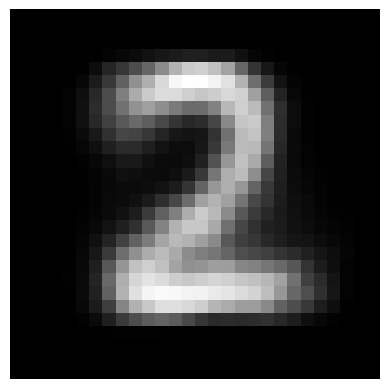

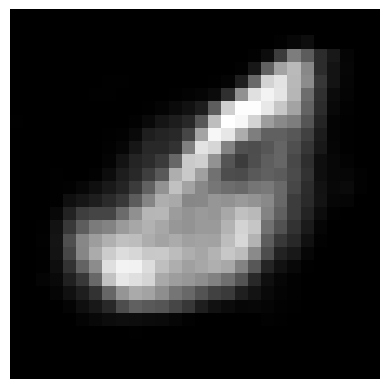

(None, None)

In [15]:
generate_digit(vae, 0.3, 0.0), generate_digit(vae, 0.8, 1.0)